# Comparision: FEM vs. other methods

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/danhtaihoang/hidden-variables/master?filepath=sphinx%2Fcodesource%2Fhidden.ipynb)

We compare the performance of Free Energy Minimization (FEM) with other existing methods based on mean field approximations and Maximum Likelihood Estimation (MLE).

First of all, we import the necessary packages to the jupyter notebook:

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

We generate a true interaction matrix `w0` and time series data `s0`.

In [2]:
# parameter setting:
n0 = 40  # number of variables
g = 4.0  # interaction variability parameter

w0 = np.random.normal(0.0,g/np.sqrt(n0),size=(n0,n0))

# generating time-series data
l = int(2*(n0**2))
s0 = simulate.generate_data(w0,l)

Suppose only a subset of variables is observed.

In [3]:
nh0 = 10
n = n0 - nh0
s = s0[:,:n].copy()

We use a number of hidden variables as its actual value.

In [4]:
nh = nh0

Because we will plot the prediction result of every methods, let us write a plot function.

In [5]:
def plot_result(w0,w):
    plt.figure(figsize=(13.2,3.2))

    plt.subplot2grid((1,4),(0,0))
    plt.title('observed to observed')
    plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
    plt.scatter(w0[:n,:n],w[:n,:n])
    plt.xticks([-2,0,2])
    plt.yticks([-2,0,2])
    plt.xlabel('actual interactions')
    plt.ylabel('inferred interactions')

    plt.subplot2grid((1,4),(0,1))
    plt.title('hidden to observed')
    plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
    plt.scatter(w0[:n,n:],w[:n,n:])
    plt.xticks([-2,0,2])
    plt.yticks([-2,0,2])
    plt.xlabel('actual interactions')
    plt.ylabel('inferred interactions')

    plt.subplot2grid((1,4),(0,2))
    plt.title('observed to hidden')
    plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
    plt.xticks([-2,0,2])
    plt.yticks([-2,0,2])
    plt.scatter(w0[n:,:n],w[n:,:n])
    plt.xlabel('actual interactions')
    plt.ylabel('inferred interactions')

    plt.subplot2grid((1,4),(0,3))
    plt.title('hidden to hidden')
    plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
    plt.scatter(w0[n:,n:],w[n:,n:])
    plt.xticks([-2,0,2])
    plt.yticks([-2,0,2])
    plt.xlabel('actual interactions')
    plt.ylabel('inferred interactions')

    plt.tight_layout(h_pad=1, w_pad=1.5)
    plt.show()

## Naive Mean-Field approximation

nMF:


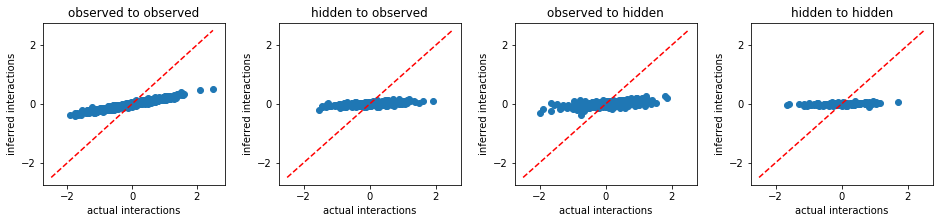

In [6]:
print('nMF:')
cost_obs,w,sh = inference.infer_hidden(s,nh,method='nmf')

w,sh = inference.hidden_coordinate(w0,s0,w,sh)

plot_result(w0,w)

## Thouless-Anderson-Palmer mean field approximation

TAP:


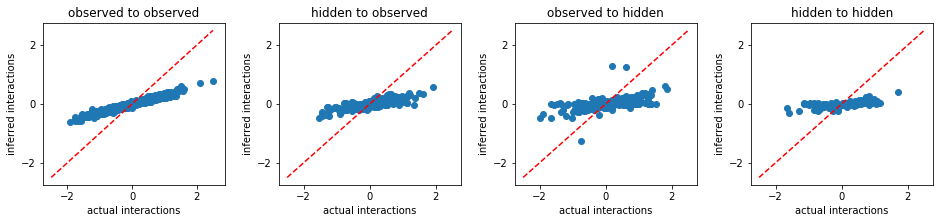

In [7]:
print('TAP:')
cost_obs,w,sh = inference.infer_hidden(s,nh,method='tap')

w,sh = inference.hidden_coordinate(w0,s0,w,sh)

plot_result(w0,w)

## Exact mean field approximation

eMF:


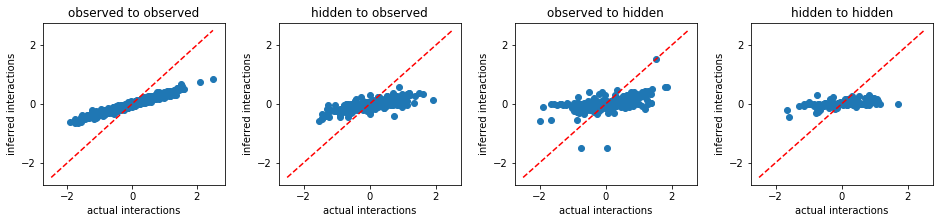

In [8]:
print('eMF:')
cost_obs,w,sh = inference.infer_hidden(s,nh,method='emf')

w,sh = inference.hidden_coordinate(w0,s0,w,sh)

plot_result(w0,w)

## Maximum Likelihood Estimation

In [ ]:
print('MLE:')
cost_obs,w,sh = inference.infer_hidden(s,nh,method='mle')

w,sh = inference.hidden_coordinate(w0,s0,w,sh)

plot_result(w0,w)

MLE:


## Free Energy Minimization

In [ ]:
print('FEM:')
cost_obs,w,sh = inference.infer_hidden(s,nh,method='fem')

w,sh = inference.hidden_coordinate(w0,s0,w,sh)

plot_result(w0,w)

From the above results, we conclude that FEM outperforms other existing methods.